# Домашнее задание № 3

Провести кластеризацию для датасета с использованием класического метода и метода на основе нечеткой логики

In [11]:
# Импортируем библиотеки
!pip install fuzzy-c-means
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from fcmeans import FCM  # Fuzzy C-Means
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import kagglehub

In [17]:
# Загрузка данных
path = kagglehub.dataset_download("parulpandey/palmer-archipelago-antarctica-penguin-data")

print("Path to dataset files:", path)

penguins = pd.read_csv('/root/.cache/kagglehub/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data/versions/1/penguins_size.csv')

# Убираем пропуски и оставляем только числовые данные
penguins = penguins.dropna()
data = penguins[["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]]

# Масштабирование данных
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

Path to dataset files: /root/.cache/kagglehub/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data/versions/1


# Алгоритмы

## **I. k-means**

Как работает:

1. Выбираются k случайных центроидов.

2. Каждая точка данных привязывается к ближайшему центроиду (по евклидовому расстоянию).

3. Центроиды обновляются как среднее всех точек, привязанных к каждому кластеру.

4. Шаги 2 и 3 повторяются, пока центроиды не перестанут изменяться (или достигается максимальное количество итераций).

Гиперпараметры:

* k: количество кластеров (основной параметр).

* init: способ начальной инициализации центроидов (по умолчанию k-means++).

* max_iter: максимальное количество итераций (по умолчанию 300).

* tol: допустимая ошибка для остановки (по умолчанию 1e−4).

Когда работает хорошо:

- Когда данные разделимы линейно.

- Кластеры имеют круглую форму и примерно одинаковый размер.

Когда работает плохо:

- Кластеры перекрываются или имеют сложные формы.

- Когда в данных есть выбросы.

In [18]:
# 1. K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

## **II. GMM (Gaussian Mixture Models):**

Как работает:

1. Инициализация параметров k гауссиан (среднее, ковариационная матрица, веса кластеров).

2. Оценка вероятности принадлежности каждой точки к каждому кластеру (ожидание, E-шаг).

3. Обновление параметров гауссиан (максимизация, M-шаг).

4. Повторение шагов 2 и 3 до сходимости.

Гиперпараметры:

- k: количество кластеров.

- covariance_type: тип ковариационной матрицы (по умолчанию full).

- tol: точность сходимости (по умолчанию 1e−3).

- max_iter: максимальное количество итераций (по умолчанию 100).

Когда работает хорошо:

- Кластеры имеют эллипсоидную форму.

- Данные можно аппроксимировать гауссианами.

Когда работает плохо:

- Кластеры сильно перекрываются.

- В данных слишком много шума.


In [19]:
# 2. Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(data_scaled)

## **III. Иерархическая кластеризация**

Как работает:

- Каждая точка — это отдельный кластер.

- Постепенно объединяются ближайшие кластеры (по выбранной метрике).

- Процесс продолжается, пока не останется один кластер или не достигнуто заданное количество кластеров.

Гиперпараметры:

- linkage: метод объединения кластеров (по умолчанию ward).

- affinity: метрика для измерения расстояний (по умолчанию euclidean).

- n_clusters: количество кластеров.

Когда работает хорошо:

- Данные имеют древовидную структуру.

- Кластеры линейно разделимы.

Когда работает плохо:

- Большие объёмы данных (высокая вычислительная сложность).

- Сложные формы кластеров.

In [20]:
# 3. Иерархическая кластеризация
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(data_scaled)

## **IV. Fuzzy C-Means**

Как работает:

- Инициализация центроидов и матрицы принадлежности точек кластерам.

- Обновление центроидов как взвешенного среднего точек с учётом матрицы принадлежности.

- Обновление матрицы принадлежности на основе расстояния точек до центроидов.

- Повторение шагов 2 и 3 до сходимости.

Гиперпараметры:

- k: количество кластеров.

- m: степень нечеткости (по умолчанию 2).

- max_iter: максимальное количество итераций (по умолчанию 100).

- error: допустимая ошибка для остановки (по умолчанию 1e−5).

Когда работает хорошо:

- Кластеры перекрываются.

- Требуется нечеткое распределение точек между кластерами.

Когда работает плохо:

- Кластеры хорошо разделены.

- Много шума или выбросов.


In [21]:
# 4. Fuzzy C-Means
fcm = FCM(n_clusters=3)
fcm.fit(data_scaled)
fcm_labels = np.argmax(fcm.u, axis=1)  # Утверждаем, что точки принадлежат кластеру с максимальной принадлежностью

## Картинки

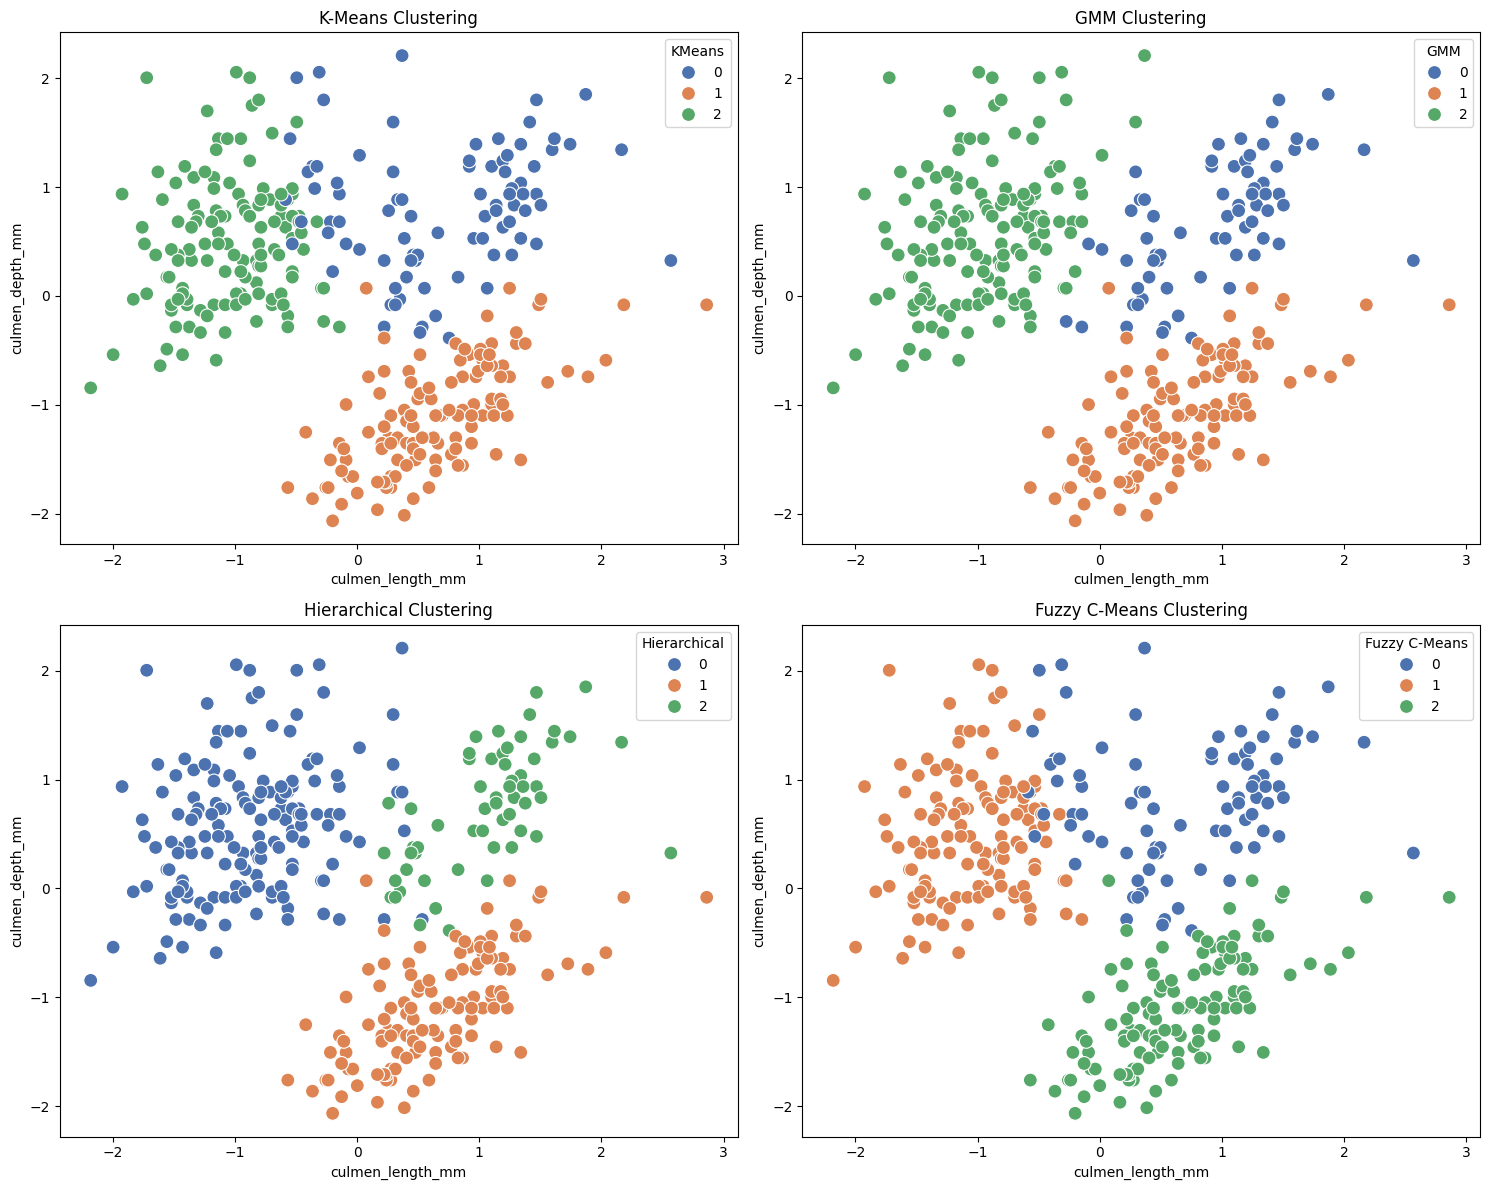

In [23]:
# Создаем DataFrame для удобства визуализации
results_df = pd.DataFrame(data_scaled, columns=["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"])
results_df["KMeans"] = kmeans_labels
results_df["GMM"] = gmm_labels
results_df["Hierarchical"] = hierarchical_labels
results_df["Fuzzy C-Means"] = fcm_labels

# 5. Визуализация результатов кластеризации
plt.figure(figsize=(15, 12))

# 5.1 K-Means
plt.subplot(2, 2, 1)
sns.scatterplot(x=results_df["culmen_length_mm"], y=results_df["culmen_depth_mm"], hue=results_df["KMeans"], palette="deep", s=100)
plt.title("K-Means Clustering")

# 5.2 GMM
plt.subplot(2, 2, 2)
sns.scatterplot(x=results_df["culmen_length_mm"], y=results_df["culmen_depth_mm"], hue=results_df["GMM"], palette="deep", s=100)
plt.title("GMM Clustering")

# 5.3 Иерархическая кластеризация
plt.subplot(2, 2, 3)
sns.scatterplot(x=results_df["culmen_length_mm"], y=results_df["culmen_depth_mm"], hue=results_df["Hierarchical"], palette="deep", s=100)
plt.title("Hierarchical Clustering")

# 5.4 Fuzzy C-Means
plt.subplot(2, 2, 4)
sns.scatterplot(x=results_df["culmen_length_mm"], y=results_df["culmen_depth_mm"], hue=results_df["Fuzzy C-Means"], palette="deep", s=100)
plt.title("Fuzzy C-Means Clustering")

plt.tight_layout()
plt.show()

## Выводы

K-Means: Делает кластеризацию с использованием алгоритма, который делит данные на k=3 кластера, выбирая центроиды и обновляя их на основе близости данных.

GMM (Gaussian Mixture Model): Применяет гауссовские смеси для кластеризации, предполагая, что данные подчиняются смеси нормальных распределений.

Иерархическая кластеризация: Создаёт древовидную структуру кластеров, объединяя их по мере уменьшения расстояния между кластерами.

Fuzzy C-Means: Этот метод использует нечеткую логику для распределения точек между кластерами с возможностью принадлежности сразу нескольким кластерам.

Графики дают представление о том, как различные алгоритмы кластеризации работают с одним и тем же набором данных, а также наглядно показывают, как эти алгоритмы разделяют точки в кластеры.